<a href="https://colab.research.google.com/github/MohammadAtabaki/Fake-News-Classification/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection Assignment
**Objective**:

Develop machine learning models to accurately detect fake news. Utilize various algorithms including Decision Tree, Random Forest, XGBoost, ExtraTrees, and LightGBM.

**Dataset**:

[Fake News Dataset from Kaggle](https://www.kaggle.com/datasets/aadyasingh55/fake-news-classification).

**Steps**:

* Data Loading: Load the dataset using Pandas.
* Preprocessing: Clean and preprocess the text data.
* Feature Extraction: Convert text to numerical data using TF-IDF.
* Data Splitting: Split the dataset into training and testing sets.
* Model Training: Train the models on the training set.
* Evaluation: Evaluate the models using accuracy on the test set.

## Step 1: Loading the Data

In [3]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv('/content/train (2).csv', sep=';')
print(train_df.shape)

test_df = pd.read_csv('/content/test (1).csv', sep=';')


val_df = pd.read_csv('/content/evaluation.csv', sep=';')


(24353, 4)


In [4]:
train_df.head()

# 1: True
# 0: False

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [5]:
train_df.isna().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [6]:
# Combine title and text columns
train_df['content'] = train_df['title'] + " " + train_df['text']
test_df['content'] = test_df['title'] + " " + test_df['text']
val_df['content'] = val_df['title'] + " " + val_df['text']

# Drop unnecessary columns
train_data = train_df.drop(columns=['Unnamed: 0', 'title', 'text'])
test_data = test_df.drop(columns=['Unnamed: 0', 'title', 'text'])
val_data = val_df.drop(columns=['Unnamed: 0', 'title', 'text'])

In [7]:
# Combine all data for tokenizer training
combined_data = pd.concat([train_data, test_data,val_data])

In [8]:
combined_data.isna().sum()

,0
label,0
content,0


When you try to apply string operations, such as lower() and split(), on a NaN value, it raised a TypeError because these operations are not defined for non-string values. So, we should drop rows containing NaN values in the text column.


In [9]:
combined_data.label.value_counts()

,count
label,
1,21924
0,18663


## Step 2: Text Preprocessing

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import cProfile

# from nltk.stem.snowball import SnowballStemmer
# Function to clean the text
# a list of common English stopwords such as "the," "and," "is," etc.
cachedStopWords = stopwords.words("english")
def clean_text(text):
  # keep only the letters
  text = re.sub('[^a-zA-Z]', ' ', text) #%
  text = text.lower()
  # remove stopwords before tokenization
  text = [word for word in text.split() if word not in cachedStopWords]
  # apply stemming
  ps = PorterStemmer()
  text = [ps.stem(word) for word in text]
  text = ' '.join(text)
  return text

# Apply the cleaning function to your text data column
combined_data['processed_text'] = combined_data['content'].apply(clean_text)

In [12]:
combined_data.head()

,label,content,processed_text
0,1,Palestinians switch off Christmas lights in Be...,palestinian switch christma light bethlehem an...
1,1,China says Trump call with Taiwan president wo...,china say trump call taiwan presid chang islan...
2,0,FAIL! The Trump Organization’s Credit Score W...,fail trump organ credit score make laugh contr...
3,1,Zimbabwe military chief's China trip was norma...,zimbabw militari chief china trip normal visit...
4,0,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,uncourag presid ever receiv courag award proce...


## Step 3: Feature Extraction


Using TfidfVectorizer, it combines the functionality of **CountVectorizer** and **TfidfTransformer** in a single step. It tokenizes the text and computes the TF-IDF representation directly.

 TF-IDF (Term Frequency-Inverse Document Frequency) assigns a weight to each word in a document based on its importance not only in that document but also in the context of the entire corpus. This weight reflects the significance of a word in distinguishing the document from the rest of the corpus, taking into account both how often the word appears in the document (term frequency) and how unique or rare it is across the corpus (inverse document frequency). The resulting TF-IDF scores provide a numerical representation of the importance of each word in the document.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF stands for Term Frequency-Inverse Document Frequency.
# Extract features with 5000 features
tfidf = TfidfVectorizer(max_features=5000)

In [14]:
X = combined_data.processed_text
y = combined_data.label

## Step 4: Split

In [15]:
from sklearn.model_selection import train_test_split

# # Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

## Step 5: Model Training


### Decision Tree



In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### Random Forest


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

### XGBoost

**1. Gradient Boosting:** Each tree is trained to correct the errors made by the previous ones, gradually improving the overall model performance.

**2. Regularization:** XGBoost incorporates a regularization term in its objective function, which helps prevent overfitting.

**3. Tree Pruning:** Pruning involves removing branches of the trees that do not contribute significantly to the model's performance. This helps prevent the trees from becoming too deep and overfitting the training data.

**4. Feature Importance**: XGBoost provides a measure of feature importance, allowing users to understand the contribution of each feature to the model's predictions. This is valuable for feature selection and gaining insights into the underlying patterns in the data.

**5. Handling Missing Data:** XGBoost has built-in capabilities to handle missing data, making it robust in situations where the input data may have missing values.

**6. Parallelization:** XGBoost is designed to be highly scalable and efficient. It supports parallel processing, making it capable of training large datasets quickly.

**7. Cross-validation:** bold text XGBoost facilitates cross-validation, which is a technique used to assess the model's performance by splitting the data into multiple subsets for training and testing. This helps in estimating how well the model will generalize to new, unseen data.

In [19]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### ExtraTrees


Both ExtraTrees and Random Forest belong to the family of **bagging algorithms**, which aim to improve the performance and robustness of **individual** models by combining the predictions of multiple models.
ExtraTrees introduces additional randomness by selecting **random cut points** for each feature, making the trees even more diverse than RandomForest.

The main advantages of ExtraTrees include increased robustness to overfitting and improved generalization performance. The downside is that the increased randomness might make it harder to interpret the individual trees within the ensemble

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

et_classifier = ExtraTreesClassifier()
et_classifier.fit(X_train, y_train)

ExtraTreesClassifier()

### LightGBM

Similar to XGBoost, LightGBM is designed to efficiently handle large datasets and perform well in terms of speed and accuracy. It is particularly well-suited for problems with a large number of features and data instances.

**1. Leaf-wise Tree Growth:**
In the leaf-wise growth strategy, the algorithm chooses the leaf node with the highest gain (reduction in the loss function) at each step and expands it. This can lead to a deeper and more complex tree, which may capture intricate patterns in the data. However, it also increases the risk of overfitting, so regularization techniques are often used to control the depth of the tree.

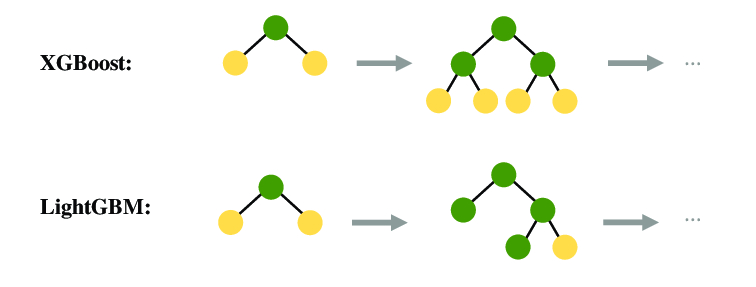

**2. Categorical Feature Support:** LightGBM provides native support for categorical features without requiring one-hot encoding. This simplifies the preprocessing step and reduces the dimensionality of the feature space. **Categorical features can be represented as object types in your dataset.**

**3. Parallel and Distributed Training:** LightGBM supports parallel and distributed training, making it suitable for distributed computing environments. This feature enhances its scalability, allowing it to handle even larger datasets.

**4. Regularization:** LightGBM includes regularization techniques to prevent overfitting. Users can control the complexity of the model by adjusting parameters related to regularization.

**5. GPU Acceleration:** LightGBM can leverage GPU (Graphics Processing Unit) acceleration for training, which can significantly speed up the learning process.

**6. Cross-validation and Early Stopping:** LightGBM supports cross-validation for model evaluation and early stopping to prevent overfitting.

In [21]:
from lightgbm import LGBMClassifier

lgb_classifier = LGBMClassifier()
lgb_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 17504, number of negative: 14965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.214436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 702640
[LightGBM] [Info] Number of data points in the train set: 32469, number of used features: 4994
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.539099 -> initscore=0.156715
[LightGBM] [Info] Start training from score 0.156715


LGBMClassifier()

## Step 6: Evaluation


In [22]:
from sklearn.metrics import accuracy_score

def acc_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    return acc

# Dictionary of your pre-trained models
pretrained_models = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "XGBoost": xgb_classifier,
    "ExtraTrees": et_classifier,
    "LightGBM": lgb_classifier}

# Evaluate each pre-trained model and store results
acc_scores = {name: acc_model(model, X_test, y_test) for name, model in pretrained_models.items()}

for model, acc in acc_scores.items():
  print(f"{model}: {acc * 100:.2f}%")

Decision Tree: 97.56%
Random Forest: 98.31%
XGBoost: 98.50%
ExtraTrees: 97.06%
LightGBM: 98.45%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Step 7: Comparing Model Performance using ROC AUC Score


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


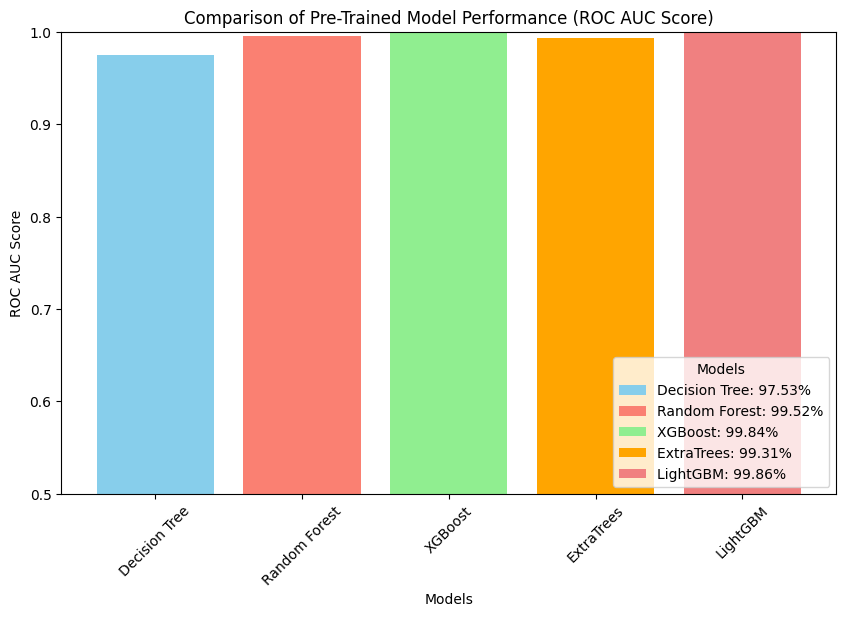

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Function to evaluate a pre-trained model and return its ROC AUC score
def evaluate_pretrained_model(model, X_test, y_test):
    predictions = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, predictions)
    return roc_auc

# Evaluate each pre-trained model and store results
roc_auc_scores = {name: evaluate_pretrained_model(model, X_test, y_test) for name, model in pretrained_models.items()}

# Plotting the results
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']
plt.figure(figsize=(10, 6))
bars = plt.bar(roc_auc_scores.keys(), roc_auc_scores.values(), color=colors)

# Adding legend with model names and corresponding ROC AUC scores
legend_labels = [f"{model}: {roc_auc * 100:.2f}%" for model, roc_auc in roc_auc_scores.items()]
for bar, label in zip(bars, legend_labels):
    bar.set_label(label)

plt.legend(title='Models', loc='lower right')

# xlabel or xticks?
plt.xlabel('Models')
# ylabel or yticks?
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Pre-Trained Model Performance (ROC AUC Score)')
plt.ylim([0.5, 1.0])  # Adjust based on your ROC AUC score range
# xlabel or xticks?
plt.xticks(rotation=45)
# how show the diagram?
plt.show()